In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


#### *Basic Library imports*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

#### *Inspecting Training Data*

In [3]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## *Exploratory Data Analysis*

#### *Plot shows the Frequuency of each digit appearing in the Target  column of Train data*

<AxesSubplot:xlabel='label', ylabel='count'>

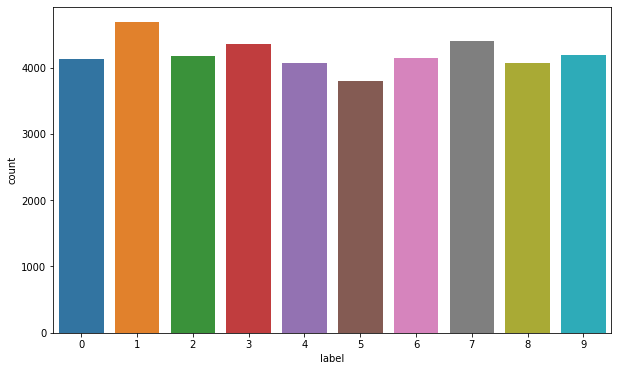

In [6]:
plt.figure(figsize = (10,6))
sns.countplot(x="label", data=train)

In [7]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

#### *Features in the Train Data*

In [8]:
train_features = train.drop("label", axis=1)
type(train_features)
train_features

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### *Target in the Train Data*

In [9]:
train_target = train["label"]
train_target.shape

(42000,)

#### *Splitting the train Data into Train set & Validation set to check for the accuracy & loss after training the model*

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(train_features, train_target, test_size = 0.25, random_state = 42)
X_train.shape

(31500, 784)

## *Data Preprocessing*

#### *Scaling X_train & X_val between 0 , 1. Each row has 784 pixel values between 0 & 255, so scale to use them in Keras layers*

In [11]:
X_train = X_train / 255.0
X_val = X_val / 255.0

#### *Transforming the 2Dimentional array to 1Dimentional array without changing the values*

In [12]:
X_train_flattened = X_train.to_numpy()
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X_train_flattened.shape

(31500, 784)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
X_train_reshaped = X_train_flattened.reshape(X_train_flattened.shape[0], 28, 28, 1)
print(X_train_reshaped.shape)                

(31500, 28, 28, 1)


#### *Preprocessing Validation Data*

In [16]:
X_val_flattened = X_val.to_numpy()
X_val_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
X_val_flattened.shape

(10500, 784)

In [18]:
X_val_reshaped = X_val_flattened.reshape(X_val_flattened.shape[0], 28, 28, 1)
print(X_val_reshaped.shape)      

(10500, 28, 28, 1)


## *Building a Model*

#### *Defining keras layers*

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
            layers.Conv2D(filters=64, kernel_size=3, activation = 'relu', input_shape = (28, 28, 1), padding='same'),
            layers.MaxPool2D(),
            layers.Conv2D(filters=128, kernel_size=3, activation = 'relu', padding='same'),
            layers.MaxPool2D(),
            layers.Flatten(),
            layers.Dense(512, activation = 'relu'),
            layers.Dense(10, activation = 'softmax')
])


#### *Compiling the model*

In [20]:
model.compile(
        optimizer = 'adam',
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
)

In [21]:
early_stopping = keras.callbacks.EarlyStopping(min_delta=0.001, 
                               patience = 5, 
                               restore_best_weights = True)

## *Training the model*

In [22]:
history = model.fit(X_train_reshaped, y_train, 
                    validation_data = (X_val_reshaped, y_val),
                    callbacks = [early_stopping],
                    epochs=20)
                    

Epoch 1/20
985/985 [==============================] - 11s 4ms/step - loss: 0.2874 - accuracy: 0.9076 - val_loss: 0.0538 - val_accuracy: 0.9835
Epoch 2/20
985/985 [==============================] - 4s 4ms/step - loss: 0.0406 - accuracy: 0.9868 - val_loss: 0.0587 - val_accuracy: 0.9829
Epoch 3/20
985/985 [==============================] - 4s 4ms/step - loss: 0.0332 - accuracy: 0.9901 - val_loss: 0.0383 - val_accuracy: 0.9878
Epoch 4/20
985/985 [==============================] - 4s 4ms/step - loss: 0.0198 - accuracy: 0.9931 - val_loss: 0.0472 - val_accuracy: 0.9870
Epoch 5/20
985/985 [==============================] - 4s 4ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0393 - val_accuracy: 0.9890
Epoch 6/20
985/985 [==============================] - 4s 4ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.0409 - val_accuracy: 0.9891
Epoch 7/20
985/985 [==============================] - 4s 4ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0461 - val_accuracy: 0.9876
Epoch

## *Model Validation*

#### *Dataframe of Train accuracy, Train loss, Validation accuracy & Validation loss*

In [23]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.133268,0.958095,0.053753,0.983524
1,0.042176,0.986476,0.058735,0.982857
2,0.029828,0.990730,0.038346,0.987810
3,0.022778,0.992127,0.047217,0.986952
4,0.016192,0.994794,0.039311,0.989048
5,0.010662,0.996095,0.040948,0.989143
6,0.010465,0.996349,0.046145,0.987619
7,0.011886,0.996222,0.039754,0.990667


#### *Plot the train & validation loss curves and estimate the performance of our model*

<AxesSubplot:>

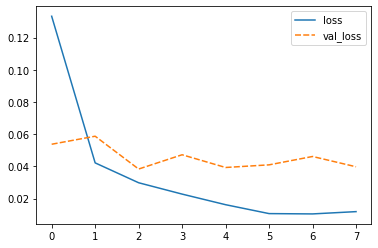

In [24]:
sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]])


#### *Plot the train & validation accuracy curves to estimate the performance of our model*

<AxesSubplot:>

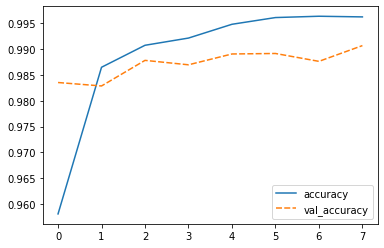

In [25]:
sns.lineplot(data=history_df.loc[:, ["accuracy", "val_accuracy"]])

In [26]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test = test/255.0
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
test_flattened = test.to_numpy()
test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
test_reshaped = test_flattened.reshape(test.shape[0], 28, 28 ,1)
test_reshaped.shape

(28000, 28, 28, 1)

In [30]:
test_predictions = model.predict(test_reshaped)
test_predict = [np.argmax(i) for i in test_predictions]


In [31]:
output = pd.DataFrame(data=np.array(test_predict), columns=['Label'])
output

,Label
0,2
1,0
2,9
3,9
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [32]:
output.index = np.arange(1, len(output)+1)



In [33]:
output["ImageId"] = output.index

In [34]:
output = output[["ImageId", "Label"]]
output

,ImageId,Label
1,1,2
2,2,0
3,3,9
4,4,9
5,5,3
...,...,...
27996,27996,9
27997,27997,7
27998,27998,3
27999,27999,9


In [35]:
output.to_csv("submission", index=False)